<a href="https://colab.research.google.com/github/AndreAntonioCampos/FIAP_POS/blob/main/TechChallengerFase3_Parte_Andre_Clayton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Instalação Google Cloud Bigquery

!pip install google-cloud-bigquery pandas
!pip install db-dtypes

In [106]:
# Importação das Bibliotecas

from google.cloud import bigquery
import db_dtypes
import pandas as pd

import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/content/credenciais.json'
import warnings
warnings.filterwarnings('ignore')


In [107]:
client = bigquery.Client()

No Select abaixo é possível identificar os itens escolhidos para o discorrer das nossas análises e resultados

## Base de Dados

In [108]:
query = """
        SELECT
         a.ano
        ,a.mes
        ,a.semana
        ,a.sigla_uf
        ,a.capital
        ,a.rm_ride
        ,a.estrato
        ,a.upa
        ,a.V1022 as id_situacao_domicilio
        ,a.A001B3 as ano_nascimento
        ,a.A002 as idade_morador
        ,a.A003 as id_sexo
        ,a.A004 as id_cor_raca
        ,a.A005 as id_escolaridade
        ,a.B0011 as id_febre_sm
        ,a.B0012 as id_tosse_sm
        ,a.B0013 as id_dor_garganta_sm
        ,a.B0014 as id_dif_respirar_sm
        ,a.B0015 as id_dor_cabeca_sm
        ,a.B0016 as id_dor_peito_sm
        ,a.B0017 as id_nausea_sm
        ,a.B0018 as id_nariz_entupido_sm
        ,a.B0019 as id_fadiga_sm
        ,a.B00110 as id_dor_olhos_sm
        ,a.B00111 as id_perda_cheiro_sabor_sm
        ,a.B00112 as id_dor_muscular_sm
        ,a.B0033 AS id_remedio_conta_propria
        ,a.B0034 as id_remedio_orientacao_medica
        ,a.B005  as id_internado_1_mais
        ,a.B006  as id_sedado_entubado
        ,a.C007B  as id_clt_funcpublico
        ,a.C007C  as id_tipo_trabalho
        ,a.C01011 as id_faixa_rendimento
        ,a.D0051 as id_auxilio_emergencial
        ,a.D0053 as tt_valores_recebidos
        ,a.F001 as tipo_domicilio

        FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19` a
        LIMIT 100
"""

In [109]:
dados = client.query(query).to_dataframe()

In [110]:
dados.head()

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_situacao_domicilio,ano_nascimento,idade_morador,id_sexo,id_cor_raca,id_escolaridade,id_febre_sm,id_tosse_sm,id_dor_garganta_sm,id_dif_respirar_sm,id_dor_cabeca_sm,id_dor_peito_sm,id_nausea_sm,id_nariz_entupido_sm,id_fadiga_sm,id_dor_olhos_sm,id_perda_cheiro_sabor_sm,id_dor_muscular_sm,id_remedio_conta_propria,id_remedio_orientacao_medica,id_internado_1_mais,id_sedado_entubado,id_clt_funcpublico,id_tipo_trabalho,id_faixa_rendimento,id_auxilio_emergencial,tt_valores_recebidos,tipo_domicilio
0,2020,5,3,AP,16,16,1610120,160000808,2,2019,1,2,4,1,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,1,1200.0,1
1,2020,5,1,AP,16,16,1610112,160001352,1,1977,42,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,6,None,1,600.0,1
2,2020,5,4,AP,16,16,1610111,160002791,1,9999,48,1,4,5,1,2,2,1,1,2,2,1,2,2,2,2,1,2,None,None,None,None,None,2,NaN,1
3,2020,5,1,AP,16,16,1610111,160004439,1,2006,13,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,2,2,None,None,None,None,None,2,NaN,1
4,2020,5,2,AP,16,16,1610111,160004900,1,1978,41,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,1,29,4,2,NaN,5


In [111]:
import pandas as pd

# Configurar pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Agora você pode exibir o DataFrame
display(dados)

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_situacao_domicilio,ano_nascimento,idade_morador,id_sexo,id_cor_raca,id_escolaridade,id_febre_sm,id_tosse_sm,id_dor_garganta_sm,id_dif_respirar_sm,id_dor_cabeca_sm,id_dor_peito_sm,id_nausea_sm,id_nariz_entupido_sm,id_fadiga_sm,id_dor_olhos_sm,id_perda_cheiro_sabor_sm,id_dor_muscular_sm,id_remedio_conta_propria,id_remedio_orientacao_medica,id_internado_1_mais,id_sedado_entubado,id_clt_funcpublico,id_tipo_trabalho,id_faixa_rendimento,id_auxilio_emergencial,tt_valores_recebidos,tipo_domicilio
0,2020,5,3,AP,16,16,1610120,160000808,2,2019,1,2,4,1,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,1,1200.0,1
1,2020,5,1,AP,16,16,1610112,160001352,1,1977,42,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,6,None,1,600.0,1
2,2020,5,4,AP,16,16,1610111,160002791,1,9999,48,1,4,5,1,2,2,1,1,2,2,1,2,2,2,2,1,2,None,None,None,None,None,2,NaN,1
3,2020,5,1,AP,16,16,1610111,160004439,1,2006,13,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,2,2,None,None,None,None,None,2,NaN,1
4,2020,5,2,AP,16,16,1610111,160004900,1,1978,41,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,1,29,4,2,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020,7,3,AC,None,None,1250010,120010584,1,2010,9,1,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,1,600.0,1
96,2020,8,2,AC,None,None,1250010,120000412,1,1975,44,1,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,3,23,4,1,600.0,1
97,2020,8,1,AC,None,None,1250010,120000412,1,1996,24,1,4,4,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,2,NaN,1
98,2020,8,2,AC,None,None,1250010,120000843,1,2015,5,1,4,1,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,2,NaN,1


In [112]:
print(dados.dtypes)

ano                               Int64
mes                               Int64
semana                            Int64
sigla_uf                         object
capital                          object
rm_ride                          object
estrato                          object
upa                              object
id_situacao_domicilio            object
ano_nascimento                    Int64
idade_morador                    object
id_sexo                          object
id_cor_raca                      object
id_escolaridade                  object
id_febre_sm                      object
id_tosse_sm                      object
id_dor_garganta_sm               object
id_dif_respirar_sm               object
id_dor_cabeca_sm                 object
id_dor_peito_sm                  object
id_nausea_sm                     object
id_nariz_entupido_sm             object
id_fadiga_sm                     object
id_dor_olhos_sm                  object
id_perda_cheiro_sabor_sm         object


## Análise Exploratória

### Características gerais dos moradores

In [113]:
query2 = """
        SELECT
         a.ano
        ,a.mes
        ,a.semana
        ,a.sigla_uf
        ,a.capital
        ,a.rm_ride
        ,a.estrato
        ,a.upa
        ,CASE
                WHEN CAST(a.V1022 AS INT64) = 1 THEN 'Urbana'
                WHEN CAST(a.V1022 AS INT64) = 2 THEN 'Rural'
                ELSE 'Desconhecido'
        END AS id_situacao_domicilio
        ,a.A001B3 as ano_nascimento
        ,a.A002 as idade_morador
        ,CASE
                WHEN CAST(a.A003 AS INT64) = 1 THEN 'Masculino'
                WHEN CAST(a.A003 AS INT64) = 2 THEN 'Feminino'
                ELSE 'Desconhecido'
        END AS id_sexo_label

        ,CASE
               WHEN CAST(a.A004 AS INT64) = 1 THEN 'Branca'
               WHEN CAST(a.A004 AS INT64) = 2 THEN 'Preta'
               WHEN CAST(a.A004 AS INT64) = 3 THEN 'Amarela'
               WHEN CAST(a.A004 AS INT64) = 4 THEN 'Parda'
               WHEN CAST(a.A004 AS INT64) = 5 THEN 'Indígena'
               ELSE 'Ignorada'
        END AS id_cor_raca

        ,CASE
               WHEN CAST(a.A005 AS INT64) = 1 THEN 'S/ Inst'
               WHEN CAST(a.A005 AS INT64) = 2 THEN 'Fund. Incompl.'
               WHEN CAST(a.A005 AS INT64) = 3 THEN 'Fund. Compl.'
               WHEN CAST(a.A005 AS INT64) = 4 THEN 'Médio Incompl.'
               WHEN CAST(a.A005 AS INT64) = 5 THEN 'Médio Compl.'
               WHEN CAST(a.A005 AS INT64) = 6 THEN 'Sup. Incompl.'
               WHEN CAST(a.A005 AS INT64) = 7 THEN 'Sup Compl.'
               ELSE 'Pós, Mest, Dout'
        END AS id_escolaridade
        FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19` a
        where a.mes between 5 and 7

"""

In [114]:
dados2 = client.query(query2).to_dataframe()

In [115]:
display(dados2)

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_situacao_domicilio,ano_nascimento,idade_morador,id_sexo_label,id_cor_raca,id_escolaridade
0,2020,5,4,AP,16,16,1610111,160002090,Urbana,1994,25,Feminino,Branca,Médio Compl.
1,2020,7,2,AP,None,16,1620010,160001136,Urbana,1983,37,Feminino,Parda,Médio Compl.
2,2020,7,2,AP,16,16,1610111,160007238,Urbana,1997,23,Masculino,Parda,Sup Compl.
3,2020,5,3,AC,12,None,1210010,120000082,Urbana,1996,23,Feminino,Parda,Médio Compl.
4,2020,5,4,AC,12,None,1210010,120001398,Urbana,1995,25,Feminino,Parda,Sup Compl.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114737,2020,7,3,MG,None,None,3154011,310326043,Urbana,2013,6,Feminino,Parda,Fund. Incompl.
1114738,2020,7,2,MG,None,None,3152012,310337818,Urbana,1983,36,Masculino,Parda,Sup Compl.
1114739,2020,7,2,MG,31,31,3110213,310358950,Urbana,1976,44,Feminino,Parda,Médio Compl.
1114740,2020,7,2,MG,None,31,3120012,310391706,Urbana,1995,25,Feminino,Parda,Médio Compl.


In [116]:
quantidade_meses = dados2['mes'].nunique()
print(f"Quantidade de meses distintos: {quantidade_meses}")

Quantidade de meses distintos: 3


### Distribuição etária dos Moradores

In [117]:
# Converter a coluna 'idade_morador' para numérico, forçando erros a se tornarem NaN
dados2['idade_morador'] = pd.to_numeric(dados2['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados2['faixa_etaria'] = pd.cut(dados2['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Contar a quantidade de moradores por faixa etária
distribuicao_etaria = dados2['faixa_etaria'].value_counts()
print(distribuicao_etaria)

faixa_etaria
0-18     272577
19-35    268379
36-50    244507
51-65    199437
65+      120797
Name: count, dtype: int64


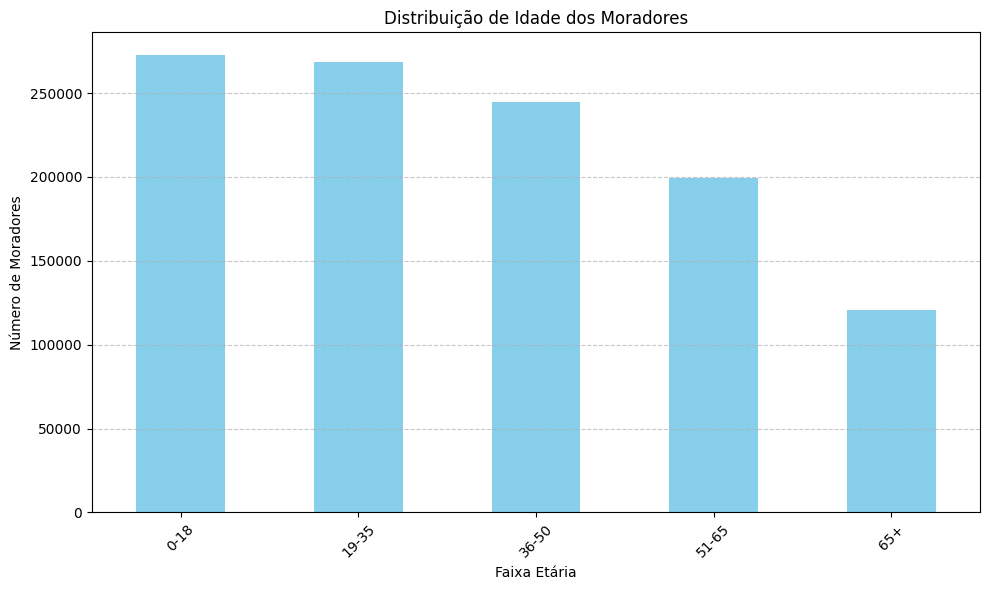

In [118]:
import matplotlib.pyplot as plt

# Converter a coluna 'idade_morador' para numérico, forçando erros a se tornarem NaN
dados2['idade_morador'] = pd.to_numeric(dados2['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados2['faixa_etaria'] = pd.cut(dados2['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Contar a quantidade de moradores por faixa etária
distribuicao_etaria = dados2['faixa_etaria'].value_counts().sort_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
distribuicao_etaria.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Idade dos Moradores')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Moradores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Proporção de Moradores por Sexo

In [119]:
# Contar a quantidade de moradores por sexo
proporcao_sexo = dados2['id_sexo_label'].value_counts(normalize=True) * 100
print(proporcao_sexo)

id_sexo_label
Feminino     51.985033
Masculino    48.014967
Name: proportion, dtype: float64


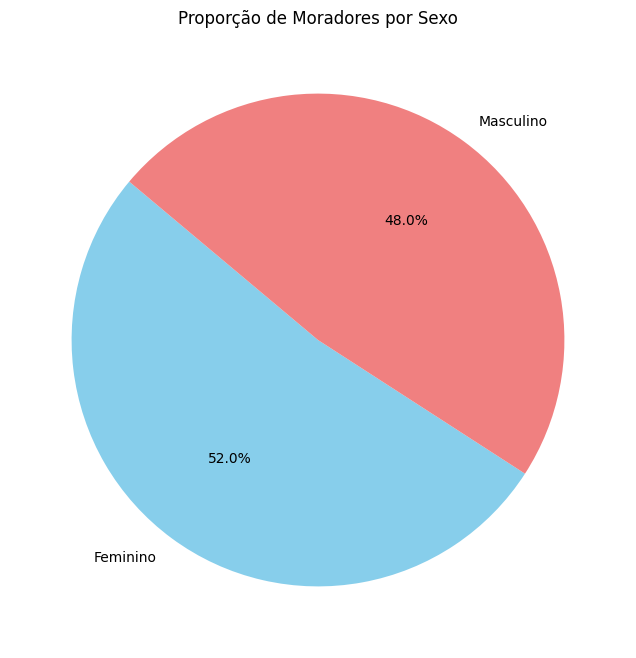

In [120]:
# Contar a quantidade de moradores por sexo e calcular a proporção
proporcao_sexo = dados2['id_sexo_label'].value_counts(normalize=True) * 100

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(proporcao_sexo, labels=proporcao_sexo.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Proporção de Moradores por Sexo')

# Exibir o gráfico
plt.show()

### Escolaridade da População

In [121]:
# Contar a quantidade de pessoas por nível de escolaridade
distribuicao_escolaridade = dados2['id_escolaridade'].value_counts()
print(distribuicao_escolaridade)

id_escolaridade
Fund. Incompl.     372947
Médio Compl.       250790
S/ Inst            118887
Sup Compl.         106409
Médio Incompl.     104715
Fund. Compl.        74622
Sup. Incompl.       58131
Pós, Mest, Dout     28241
Name: count, dtype: int64


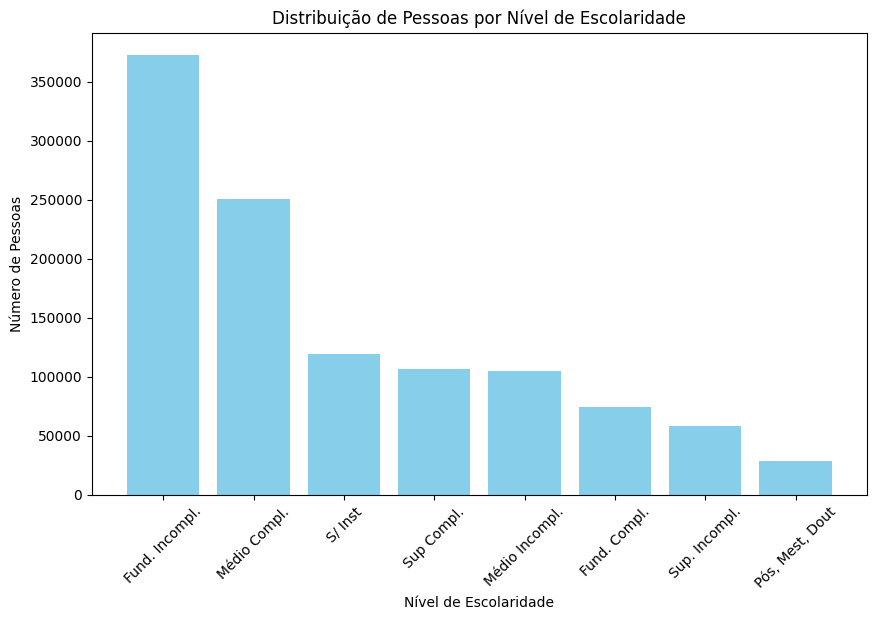

In [122]:
# Contar a quantidade de pessoas por nível de escolaridade
distribuicao_escolaridade = dados2['id_escolaridade'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(distribuicao_escolaridade.index, distribuicao_escolaridade.values, color='skyblue')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas por Nível de Escolaridade')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()

### Distribuição Geográfica por UF

In [123]:
# Contar a quantidade de moradores por estado (sigla_uf)
distribuicao_uf = dados2['sigla_uf'].value_counts()
display(distribuicao_uf)

,count
sigla_uf,
SP,103897
MG,101557
RJ,83367
SC,68356
RS,64868
PR,58938
BA,52131
MA,51728
CE,49691


### Gráfico de Distribuição por Estado

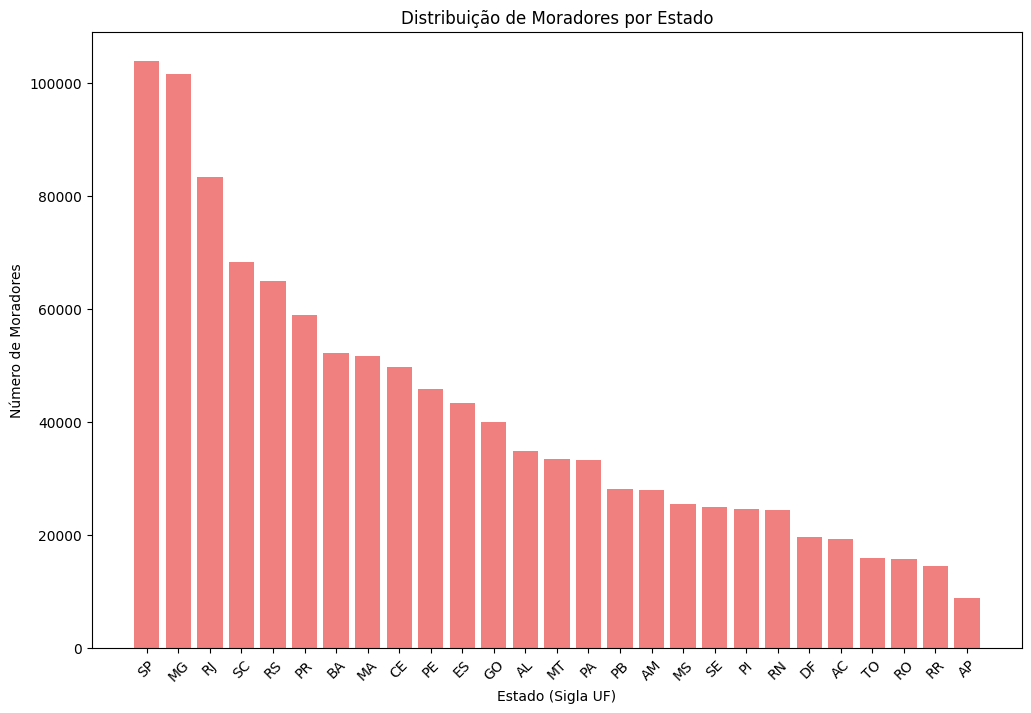

In [124]:
# Contar a quantidade de moradores por estado (sigla_uf)
distribuicao_uf = dados2['sigla_uf'].value_counts()

# Plotar o gráfico de barras para a distribuição por estado
plt.figure(figsize=(12, 8))
plt.bar(distribuicao_uf.index, distribuicao_uf.values, color='lightcoral')
plt.xlabel('Estado (Sigla UF)')
plt.ylabel('Número de Moradores')
plt.title('Distribuição de Moradores por Estado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()

### Distribuição por Situação Domiciliar

In [125]:
# Contar a quantidade de pessoas por situação domiciliar
distribuicao_situacao_domicilio = dados2['id_situacao_domicilio'].value_counts()
print(distribuicao_situacao_domicilio)

id_situacao_domicilio
Urbana    855359
Rural     259383
Name: count, dtype: int64


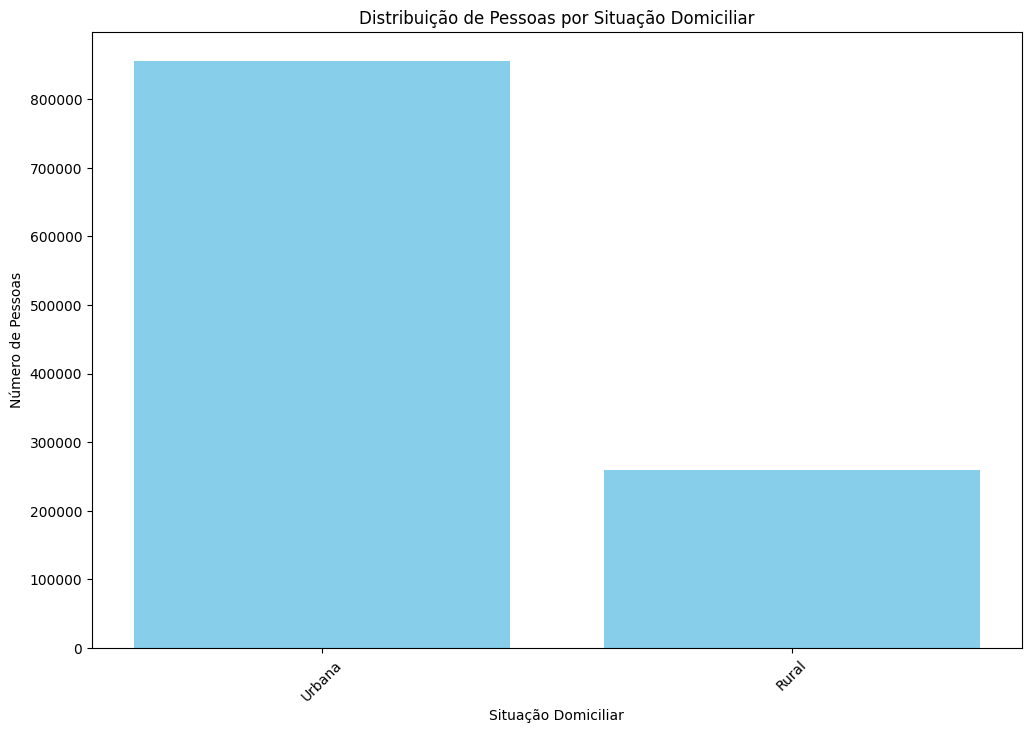

In [126]:
# Contar a quantidade de pessoas por situação domiciliar
distribuicao_situacao_domicilio = dados2['id_situacao_domicilio'].value_counts()

# Plotar o gráfico de barras para a distribuição por situação domiciliar
plt.figure(figsize=(12, 8))
plt.bar(distribuicao_situacao_domicilio.index.astype(str), distribuicao_situacao_domicilio.values, color='skyblue')
plt.xlabel('Situação Domiciliar')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas por Situação Domiciliar')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()

### Distribuição de Cor e Raça

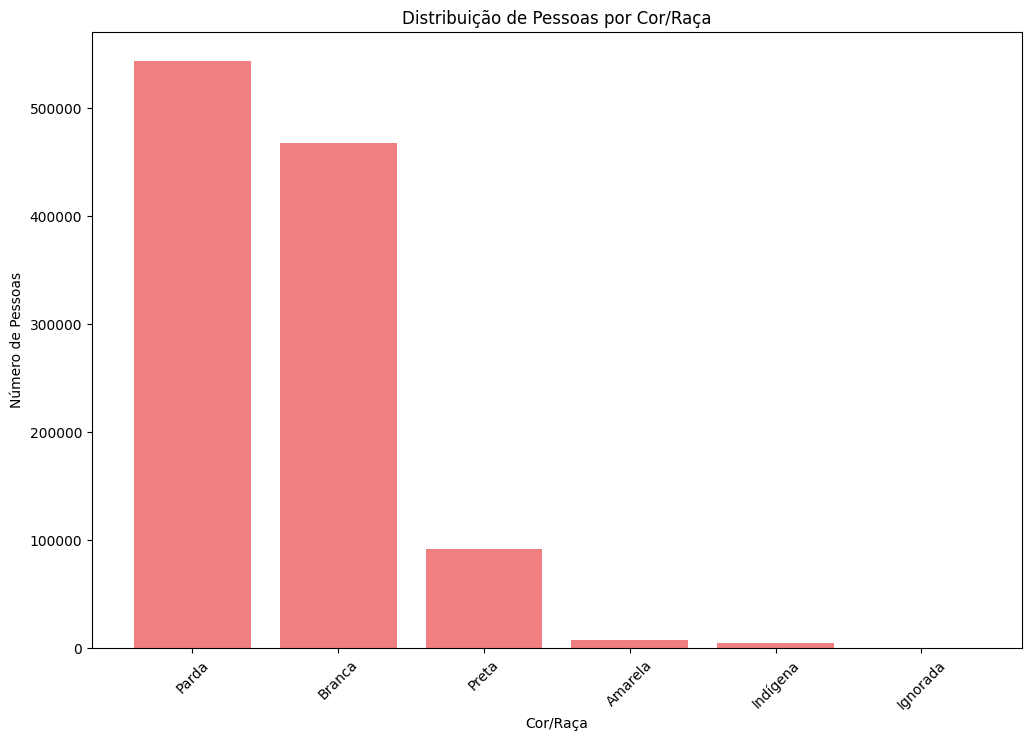

In [127]:
# Contar a quantidade de pessoas por cor/raça
distribuicao_cor_raca = dados2['id_cor_raca'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(distribuicao_cor_raca.index.astype(str), distribuicao_cor_raca.values, color='lightcoral')
plt.xlabel('Cor/Raça')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas por Cor/Raça')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()

#### Análise Correlação:  Cor e Raça x Nível de Escolaridade

In [128]:
# Contar a quantidade de pessoas por cor/raca e nível de escolaridade
contagem_cor_raca_escolaridade = pd.crosstab(dados2['id_cor_raca'], dados2['id_escolaridade'])

print(contagem_cor_raca_escolaridade)

id_escolaridade  Fund. Compl.  Fund. Incompl.  Médio Compl.  Médio Incompl.  \
id_cor_raca                                                                   
Amarela                   429            1735          1620             641   
Branca                  32920          141147        101712           37535   
Ignorada                   27             102            57              27   
Indígena                  270            1468          1022             471   
Parda                   34351          198613        123010           56466   
Preta                    6625           29882         23369            9575   

id_escolaridade  Pós, Mest, Dout  S/ Inst  Sup Compl.  Sup. Incompl.  
id_cor_raca                                                           
Amarela                      310      538        1292            485  
Branca                     18021    45492       62051          29104  
Ignorada                      15       65          24             10  
Indígena    

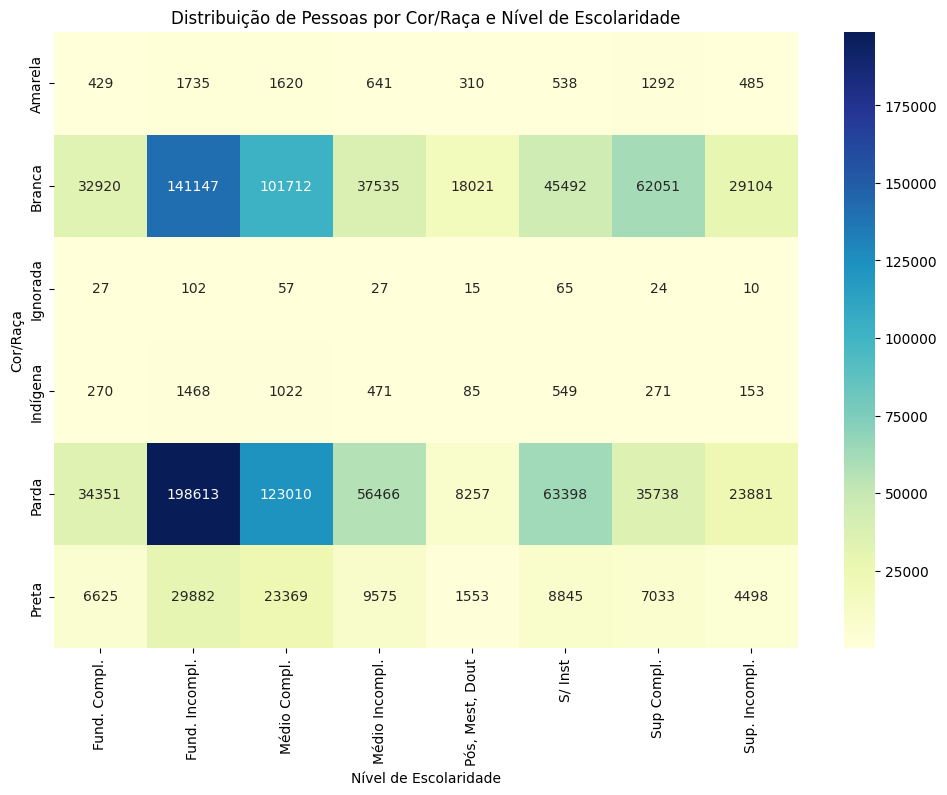

In [129]:
import seaborn as sns
# Contar a quantidade de pessoas por cor/raca e nível de escolaridade
contagem_cor_raca_escolaridade = pd.crosstab(dados2['id_cor_raca'], dados2['id_escolaridade'])

# Criar o gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(contagem_cor_raca_escolaridade, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Cor/Raça')
plt.title('Distribuição de Pessoas por Cor/Raça e Nível de Escolaridade')

# Exibir o gráfico
plt.show()

### Conclusão - Cor e Raça x Nível de Escolaridade

A partir do gráfico de calor (heatmap) acima e sobre a distribuição de pessoas por cor/raça e nível de escolaridade, podemos observar algumas tendências importantes. As seguintes conclusões podem ser tiradas:

**Predominância de pessoas pardas e brancas:**

As pessoas que se identificam como "Pardas" e "Brancas" têm a maior representação em praticamente todos os níveis de escolaridade.
O número mais alto é observado entre pessoas pardas com o ensino fundamental incompleto, seguido de perto por pessoas brancas com o mesmo nível de escolaridade.

**Escolaridade baixa é comum em todos os grupos raciais:**

Níveis de escolaridade mais baixos (ensino fundamental incompleto e completo) são os mais representados em todas as categorias de raça/cor.
Há uma concentração significativa de pessoas em "Parda" e "Branca" nos níveis de escolaridade incompletos, indicando uma grande quantidade de pessoas que não completaram o ensino básico.

**Menor representação nas categorias “Amarela”, “Indígena” e “Preta”:**

Pessoas das categorias "Amarela", "Indígena" e "Preta" aparecem em menor número, com distribuições significativamente menores em todos os níveis de escolaridade, se comparadas às categorias "Parda" e "Branca".

**Níveis de escolaridade superiores e pós-graduação:**

As representações em níveis mais altos de escolaridade (como ensino superior completo ou incompleto, e pós-graduação) são menores para todos os grupos raciais, mas ainda são maiores para as categorias "Parda" e "Branca". Isso pode refletir barreiras de acesso à educação superior.

**Distribuição homogênea na categoria "Ignorada":**

A categoria de cor/raça "Ignorada" é a menos representada em todos os níveis de escolaridade, sugerindo que uma pequena parcela da população não se identifica com as categorias estabelecidas ou não respondeu à questão sobre cor/raça.

### ANDRE

Análise dos itens

* Ao procurar o hospital, teve que ficar internado por um dia ou mais

* Durante a internação, foi sedado, entubado e colocado em respiração artificial com ventilador


* Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público

* Somatório dos valores recebidos

* Auxílios emergenciais relacionados ao coronavirus



In [130]:
query3 = """
    SELECT
        a.ano,
        a.mes,
        a.semana,
        a.sigla_uf,
        a.capital,
        a.rm_ride,
        a.estrato,
        a.upa,
        CASE
            WHEN CAST(a.B005 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B005 AS INT64) = 2 THEN 'Nao'
            WHEN CAST(a.B005 AS INT64) = 9 THEN 'Ignorada'
            ELSE 'Nao Aplicavel'
        END AS id_internado_1_mais,
        a.A001B3 AS ano_nascimento,
        a.A002 AS idade_morador,
        CASE
            WHEN CAST(a.B006 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B006 AS INT64) = 2 THEN 'Nao'
            WHEN CAST(a.B006 AS INT64) = 9 THEN 'Ignorada'
            ELSE 'Nao Aplicavel'
        END AS id_sedado_entubado,
        CASE
            WHEN CAST(a.B007 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B007 AS INT64) = 2 THEN 'Nao'
            ELSE 'Ignorada'
        END AS id_possui_plano_saude,
        CASE
            WHEN CAST(a.V1022 AS INT64) = 1 THEN 'Urbana'
            WHEN CAST(a.V1022 AS INT64) = 2 THEN 'Rural'
            ELSE 'Desconhecido'
        END AS id_situacao_domicilio,
        CASE
            WHEN CAST(a.A003 AS INT64) = 1 THEN 'Masculino'
            WHEN CAST(a.A003 AS INT64) = 2 THEN 'Feminino'
            ELSE 'Desconhecido'
        END AS id_sexo_label,
        CASE
            WHEN CAST(a.A004 AS INT64) = 1 THEN 'Branca'
            WHEN CAST(a.A004 AS INT64) = 2 THEN 'Preta'
            WHEN CAST(a.A004 AS INT64) = 3 THEN 'Amarela'
            WHEN CAST(a.A004 AS INT64) = 4 THEN 'Parda'
            WHEN CAST(a.A004 AS INT64) = 5 THEN 'Indígena'
            ELSE 'Ignorada'
        END AS id_cor_raca,
        CASE
            WHEN CAST(a.D0053 AS INT64) <= 500 THEN 'Até 500'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 501 AND 800 THEN 'Até 800'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 801 AND 1200 THEN 'Até 1200'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 1201 AND 2000 THEN 'Até 2000'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 2001 AND 5000 THEN 'Até 5000'
            ELSE 'Acima de 5000'
        END AS tt_valores_recebidos,
        CASE
            WHEN CAST(a.D0051 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.D0051 AS INT64) = 2 THEN 'Não'
            ELSE 'Ignorada'
        END AS id_auxilio_emergencial,
        CASE
            WHEN CAST(a.A005 AS INT64) = 1 THEN 'S/ Inst'
            WHEN CAST(a.A005 AS INT64) = 2 THEN 'Fund. Incompl.'
            WHEN CAST(a.A005 AS INT64) = 3 THEN 'Fund. Compl.'
            WHEN CAST(a.A005 AS INT64) = 4 THEN 'Médio Incompl.'
            WHEN CAST(a.A005 AS INT64) = 5 THEN 'Médio Compl.'
            WHEN CAST(a.A005 AS INT64) = 6 THEN 'Sup. Incompl.'
            WHEN CAST(a.A005 AS INT64) = 7 THEN 'Sup Compl.'
            ELSE 'Pós, Mest, Dout'
        END AS id_escolaridade
    FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19` a
    WHERE a.mes BETWEEN 5 AND 7
"""



In [131]:
dados3 = client.query(query3).to_dataframe()

In [153]:
dados3.head()

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_internado_1_mais,ano_nascimento,idade_morador,id_sedado_entubado,id_possui_plano_saude,id_situacao_domicilio,id_sexo_label,id_cor_raca,tt_valores_recebidos,id_auxilio_emergencial,id_escolaridade,faixa_etaria,regiao
0,2020,5,2,AP,16,16,1610112,160007720,Nao Aplicavel,1995,24,Nao Aplicavel,Nao,Urbana,Feminino,Parda,Até 2000,Sim,Sup. Incompl.,19-35,Norte
1,2020,6,3,AP,16,16,1610111,160004296,Nao Aplicavel,9999,47,Nao Aplicavel,Nao,Urbana,Masculino,Branca,Até 800,Sim,Médio Compl.,36-50,Norte
2,2020,7,1,AP,16,16,1610112,160003227,Nao Aplicavel,9999,7,Nao Aplicavel,Nao,Urbana,Masculino,Parda,Até 1200,Sim,Fund. Incompl.,0-18,Norte
3,2020,7,4,AP,16,16,1610111,160006079,Nao Aplicavel,2018,2,Nao Aplicavel,Nao,Urbana,Masculino,Branca,Até 2000,Sim,S/ Inst,0-18,Norte
4,2020,5,3,AC,12,None,1210010,120000367,Nao Aplicavel,1969,51,Nao Aplicavel,Sim,Urbana,Masculino,Parda,Acima de 5000,Não,S/ Inst,51-65,Norte


In [154]:
print(dados3.dtypes)

ano                          Int64
mes                          Int64
semana                       Int64
sigla_uf                    object
capital                     object
rm_ride                     object
estrato                     object
upa                         object
id_internado_1_mais         object
ano_nascimento               Int64
idade_morador                int64
id_sedado_entubado          object
id_possui_plano_saude       object
id_situacao_domicilio       object
id_sexo_label               object
id_cor_raca                 object
tt_valores_recebidos        object
id_auxilio_emergencial      object
id_escolaridade             object
faixa_etaria              category
regiao                      object
dtype: object


In [134]:
quantidade_meses = dados2['mes'].nunique()
print(f"Quantidade de meses distintos: {quantidade_meses}")

Quantidade de meses distintos: 3


# ANALISE EXPLORATÓRIA DE DADOS = PACIENTES COM CODIV19 QUE PERMANECERAM INTERNADOS POR MAIS DE 1 DIA

In [135]:
import pandas as pd

In [136]:
# Converter as colunas para categóricas
dados3['id_internado_1_mais'] = dados3['id_internado_1_mais'].astype(str)

# Contar os valores específicos em cada coluna
contagem_internado = dados3['id_internado_1_mais'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_internado_1_mais:")
print(contagem_internado)


Percentual de id_internado_1_mais:
id_internado_1_mais
Nao Aplicavel    99.446419
Nao               0.491414
Sim               0.062077
Ignorada          0.000090
Name: proportion, dtype: float64


* Ao visualizar o resultado do total de pacientes que ficaram internados por mais de um dia, constatamos que 99.46% não foram informados na base de dados. Para uma análise mais precisa deste critério, serão desconsiderados os resultados classificados como Nao Aplicavel para uma equidade da base.

In [137]:
# Converter a coluna para categórica
dados3['id_internado_1_mais'] = dados3['id_internado_1_mais'].astype(str)

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_internado_1_mais'] != 'Nao Aplicavel']

# Contar os valores específicos na coluna filtrada
contagem_internado_filtrada = dados_filtrados['id_internado_1_mais'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_internado_1_mais (excluindo 'Nao Aplicavel'):")
print(contagem_internado_filtrada)


Percentual de id_internado_1_mais (excluindo 'Nao Aplicavel'):
id_internado_1_mais
Nao         88.770053
Sim         11.213742
Ignorada     0.016205
Name: proportion, dtype: float64


# ANALISE POR FAIXA ETÁRIA

In [138]:
# Converter a coluna 'idade_morador' para numérico, forçando erros a se tornarem NaN
dados3['idade_morador'] = pd.to_numeric(dados3['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados3['faixa_etaria'] = pd.cut(dados3['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_internado_1_mais'] != 'Nao Aplicavel']

# Calcular os percentuais de internação por faixa etária
percentual_internacao_faixa_etaria = dados_filtrados.groupby('faixa_etaria')['id_internado_1_mais'].value_counts(normalize=True).unstack().fillna(0) * 100

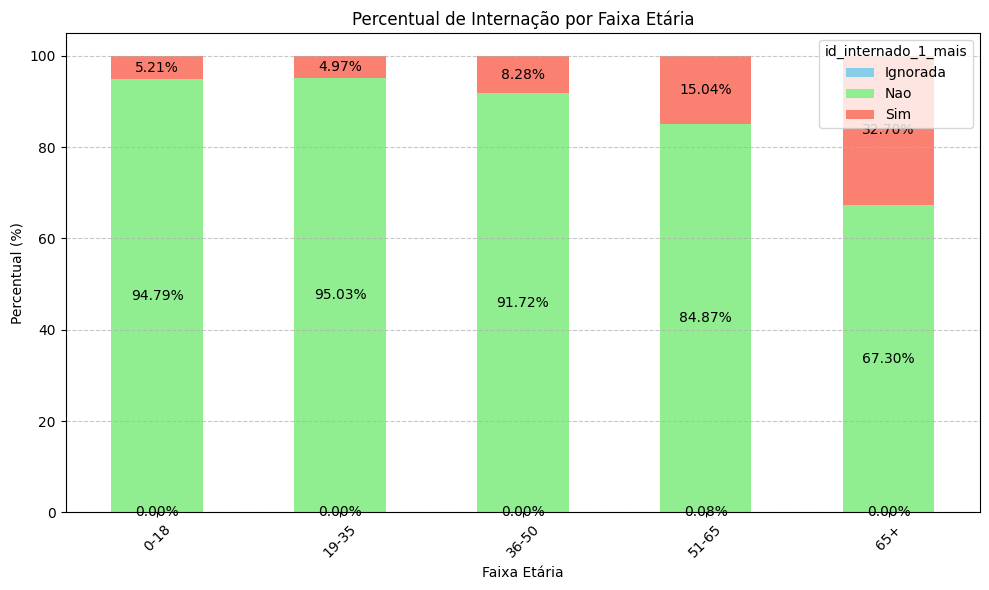

In [139]:
# Plotar o gráfico
ax = percentual_internacao_faixa_etaria.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Internação por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória da Faixa Etária do Paciente**

O gráfico “Percentual de Internação por Faixa Etária” mostra a distribuição das internações hospitalares em diferentes faixas etárias. Aqui estão os principais pontos observados:

Faixa Etária 0-19 Anos:

* Não Internados: 94.79%
* Internados: 5.21%
* Ignorados: Pequena porcentagem não especificada

Faixa Etária 20-59 Anos:

* Não Internados: 95.03%
* Internados: 4.97%
* Ignorados: Pequena porcentagem não especificada

Faixa Etária 60-79 Anos:

* Não Internados: 91.72%
* Internados: 8.28%
* Ignorados: Pequena porcentagem não especificada


Faixa Etária 80+ Anos:

* Não Internados: 84.87%
* Internados: 15.13%
* Ignorados: Pequena porcentagem não especificada



**Observações:**
Tendência de Internação: A taxa de internação aumenta significativamente com a idade. Enquanto as faixas etárias mais jovens (0-19 e 20-59 anos) têm uma baixa porcentagem de internações, as faixas etárias mais velhas (60-79 e 80+ anos) mostram um aumento notável.

Faixa Etária 80+ Anos: Esta faixa etária apresenta a maior taxa de internação (15.13%), indicando uma maior necessidade de cuidados hospitalares entre os idosos.

Faixa Etária 60-79 Anos: Também apresenta uma taxa de internação relativamente alta (8.28%), sugerindo que a necessidade de internação começa a aumentar significativamente a partir dos 60 anos.

**Conclusão:**
A análise sugere que a idade é um fator importante na probabilidade de internação hospitalar. As faixas etárias mais avançadas (60+ anos) têm uma maior necessidade de cuidados hospitalares, o que pode ser crucial para o planejamento de recursos de saúde e alocação de serviços médicos.

# ANÁLISE POR SEXO DO PACIENTE

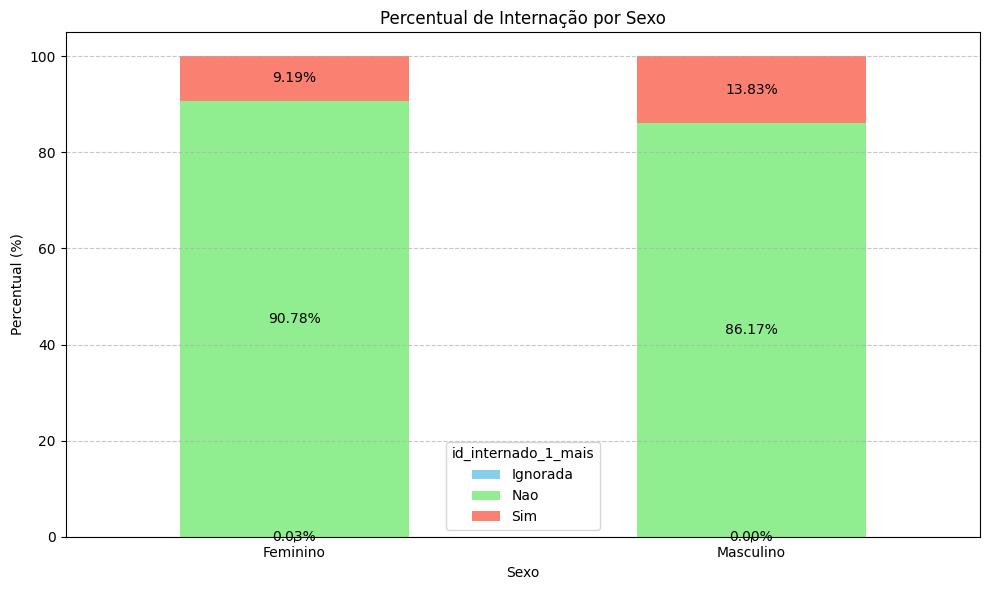

In [140]:
# Calcular os percentuais de internação por sexo
percentual_internacao_sexo = dados_filtrados.groupby('id_sexo_label')['id_internado_1_mais'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_internacao_sexo.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Internação por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()


**Resumo da Análise Exploratória Por Sexo do Paciente**


O gráfico “Percentual de Internação por Sexo” mostra a distribuição das internações hospitalares entre os sexos feminino e masculino. Aqui estão os principais pontos observados:

Sexo Feminino:

*   Internados: 90.78%
*   Não Internados: 9.19%
*   Ignorados: Pequena porcentagem não especificada


Sexo Masculino:

*    Internados: 86.17%

*    Não Internados: 13.83%

*    Ignorados: Pequena porcentagem não especificada


**Observações:**
Tendência de Internação: A taxa de internação é alta para ambos os sexos, mas é ligeiramente maior para o sexo feminino (90.78%) em comparação ao sexo masculino (86.17%).
Diferença entre os Sexos: A diferença na taxa de internação entre os sexos pode ser influenciada por vários fatores, incluindo condições de saúde específicas de cada sexo, acesso a cuidados de saúde, e comportamentos relacionados à busca por atendimento médico.


**Conclusão:**
A análise sugere que há uma alta taxa de internação hospitalar tanto para homens quanto para mulheres, com uma ligeira predominância de internações entre as mulheres. Esses dados podem ser úteis para entender melhor as necessidades de saúde de diferentes grupos e para planejar recursos e serviços de saúde de maneira mais eficaz.


# ANÁLISE POR REGIÃO

In [141]:
# Mapeamento de estados para regiões
estado_para_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Adicionar uma nova coluna 'regiao' ao DataFrame
dados3['regiao'] = dados3['sigla_uf'].map(estado_para_regiao)


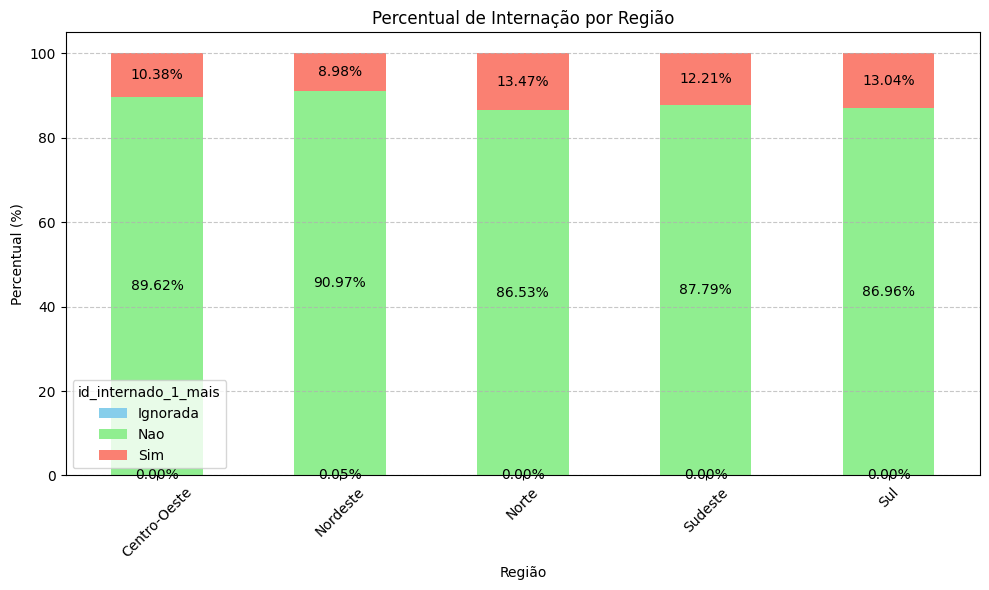

In [142]:
# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_internado_1_mais'] != 'Nao Aplicavel']

# Calcular os percentuais de internação por região
percentual_internacao_regiao = dados_filtrados.groupby('regiao')['id_internado_1_mais'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_internacao_regiao.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Internação por Região')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()




**Resumo da Análise Exploratória Por Região**


O gráfico “Percentual de Internação por Região” mostra a distribuição das internações hospitalares em diferentes regiões do Brasil. Aqui estão os principais pontos observados:

Centro-Oeste:
* Internados: 10.38%
* Não Internados: 89.62%

Nordeste:
* Internados: 8.98%
* Não Internados: 90.97%

Norte:
* Internados: 13.47%
* Não Internados: 86.53%

Sudeste:
* Internados: 12.21%
* Não Internados: 87.79%

Sul:
* Internados: 13.04%
* Não Internados: 86.96%


**Observações:**
Tendência de Internação: A taxa de internação varia entre as regiões, com o Norte (13.47%) e o Sul (13.04%) apresentando as maiores taxas de internação.
Diferença Regional: As regiões Centro-Oeste (10.38%) e Nordeste (8.98%) têm taxas de internação mais baixas em comparação com as outras regiões.


**Conclusão:**
A análise sugere que há variações regionais significativas nas taxas de internação hospitalar no Brasil. Essas diferenças podem ser influenciadas por fatores como acesso a serviços de saúde, condições socioeconômicas e prevalência de doenças específicas em cada região. Esses dados são importantes para o planejamento de recursos de saúde e a alocação de serviços médicos de maneira mais eficaz.

# ANALISE EXPLORATÓRIA DE DADOS = PACIENTES COM CODIV19 QUE FORAM SEDADOS OU ENTUBADOS OU COLOCADO EM RESPIRADOR ARTIFICIAL

# Durante a internação, foi sedado, entubado e colocado em respiração artificial com ventilador

In [143]:
# Converter as colunas para categóricas
dados3['id_sedado_entubado'] = dados3['id_sedado_entubado'].astype(str)

# Contar os valores específicos em cada coluna
contagem_internado = dados3['id_sedado_entubado'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_sedado_entubado:")
print(contagem_internado)

Percentual de id_sedado_entubado:
id_sedado_entubado
Nao Aplicavel    99.937923
Nao               0.045750
Sim               0.016147
Ignorada          0.000179
Name: proportion, dtype: float64


* Ao visualizar o resultado do total de pacientes que ficaram internados por mais de um dia, constatamos que 99.93% não foram informados na base de dados. Para uma análise mais precisa deste critério, serão desconsiderados os resultados classificados como Nao Aplicavel para uma equidade da base.

In [144]:
import pandas as pd

# Supondo que 'dados3' seja o DataFrame com os dados

# Converter a coluna para categórica
dados3['id_sedado_entubado'] = dados3['id_sedado_entubado'].astype(str)

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_sedado_entubado'] != 'Nao Aplicavel']

# Contar os valores específicos na coluna filtrada
contagem_internado_filtrada = dados_filtrados['id_sedado_entubado'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):")
print(contagem_internado_filtrada)


Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):
id_sedado_entubado
Nao         73.699422
Sim         26.011561
Ignorada     0.289017
Name: proportion, dtype: float64


Com base nos resultados das

# ENTUBADOS POR FAIXA ETÁRIA

In [145]:
dados3['idade_morador'] = pd.to_numeric(dados3['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados3['faixa_etaria'] = pd.cut(dados3['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_sedado_entubado'] != 'Nao Aplicavel']

# Calcular os percentuais de internação por faixa etária
percentual_sedados_faixa_etaria = dados_filtrados.groupby('faixa_etaria')['id_sedado_entubado'].value_counts(normalize=True).unstack().fillna(0) * 100

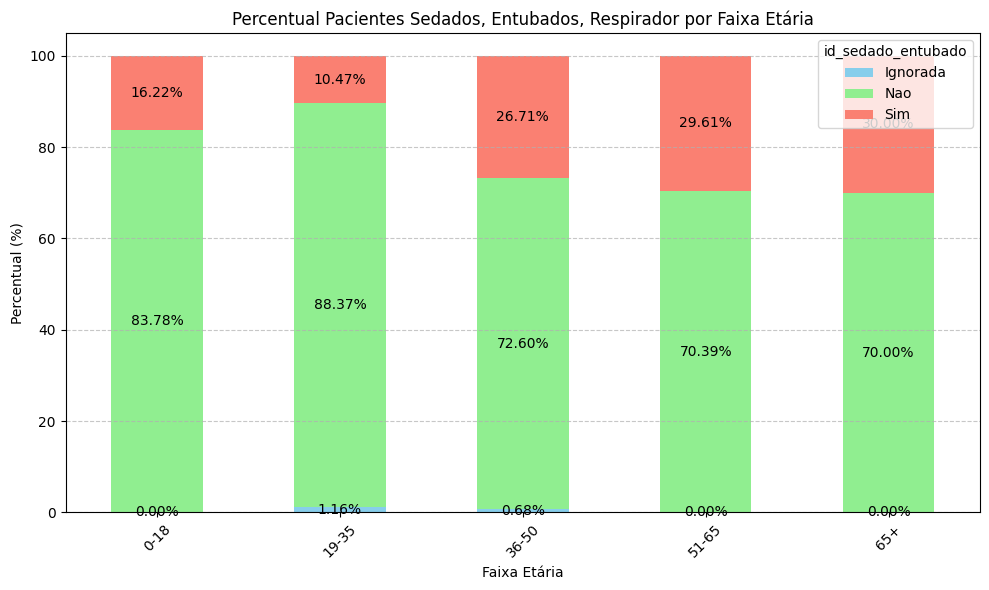

In [146]:
# Plotar o gráfico
ax = percentual_sedados_faixa_etaria.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual Pacientes Sedados, Entubados, Respirador por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória Por Faixa Etária**

O gráfico “Percentual Pacientes Sedados, Entubados, Respirador por Faixa Etária” mostra a distribuição dos pacientes que estão sedados e entubados com respirador por diferentes faixas etárias. Aqui estão os principais pontos observados:

Faixa Etária 0-9:
* Não Sedados/Entubados: 83.78%
* Sedados/Entubados: 16.22%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 10-19:
* Não Sedados/Entubados: 88.37%
* Sedados/Entubados: 10.47%
* Ignorada: 1.16%


Faixa Etária 20-39:
* Não Sedados/Entubados: 72.60%
* Sedados/Entubados: 26.71%
* Ignorada: 0.68%


Faixa Etária 40-59:
* Não Sedados/Entubados: 70.39%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 60+:
* Não Sedados/Entubados: 70.00%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


**Observações:**
Tendência Geral: A maioria dos pacientes em todas as faixas etárias não está sedada ou entubada.
Faixa Etária 20-39: Apresenta um aumento significativo no percentual de pacientes sedados e entubados (26.71%).
Faixa Etária 60+: Também tem um percentual relativamente alto de pacientes sedados e entubados (29.61%).


**Conclusão:**
Os dados indicam que, embora a maioria dos pacientes não necessite de sedação ou entubação, há um aumento notável nesses procedimentos em faixas etárias mais altas, especialmente a partir dos 20 anos. Isso pode refletir a gravidade das condições médicas que afetam essas faixas etárias.

# ENTUBADOS POR SEXO DO PACIENTE

Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):
id_sedado_entubado
Nao         73.699422
Sim         26.011561
Ignorada     0.289017
Name: proportion, dtype: float64


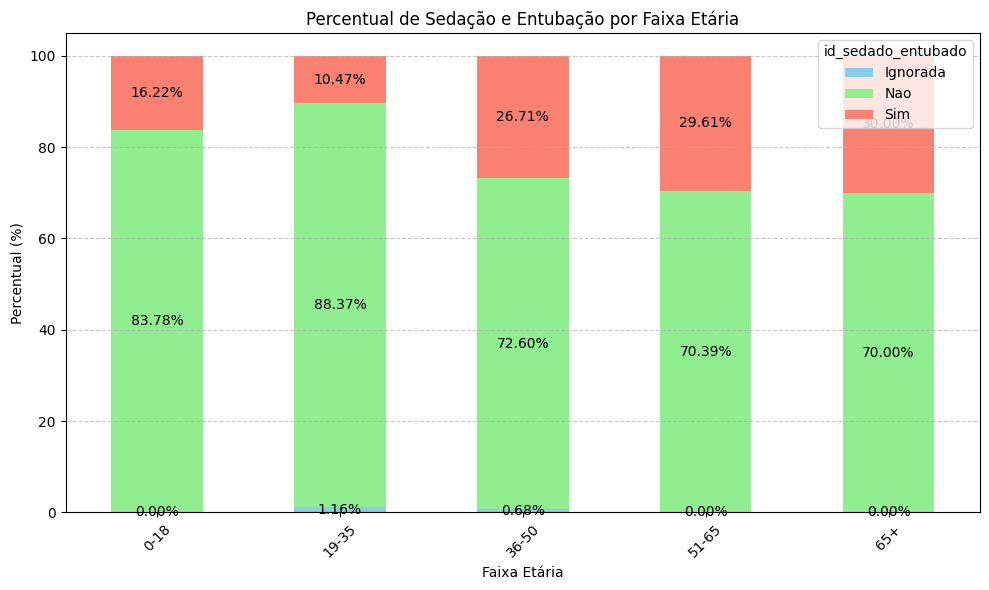

In [147]:
dados3['idade_morador'] = pd.to_numeric(dados3['idade_morador'], errors='coerce')
dados3['faixa_etaria'] = pd.cut(dados3['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
dados3['id_sedado_entubado'] = dados3['id_sedado_entubado'].astype(str)
dados_filtrados = dados3[dados3['id_sedado_entubado'] != 'Nao Aplicavel']


# Contar os valores específicos na coluna filtrada
contagem_sedado_filtrada = dados_filtrados['id_sedado_entubado'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):")
print(contagem_sedado_filtrada)

# Calcular os percentuais de sedação e entubação por faixa etária
percentual_sedacao_faixa_etaria = dados_filtrados.groupby('faixa_etaria')['id_sedado_entubado'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_sedacao_faixa_etaria.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Sedação e Entubação por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()



**Resumo da Análise Exploratória Por Faixa Etária**

O gráfico “Percentual de Sedação e Entubação por Faixa Etária” mostra a distribuição dos pacientes que estão sedados e entubados por diferentes faixas etárias.

Faixa Etária 0-19:
* Não Sedados/Entubados: 83.78%
* Sedados/Entubados: 16.22%
* Ignorada: Muito pequeno, quase insignificante

Faixa Etária 20-39:
* Não Sedados/Entubados: 72.60%
* Sedados/Entubados: 26.71%
* Ignorada: 0.68%


Faixa Etária 40-59:
* Não Sedados/Entubados: 70.39%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 60-79:
* Não Sedados/Entubados: 70.00%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 80+:
* Não Sedados/Entubados: 70.00%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


**Observações:**
Tendência Geral: A maioria dos pacientes em todas as faixas etárias não está sedada ou entubada.
Faixa Etária 20-39: Apresenta um aumento significativo no percentual de pacientes sedados e entubados (26.71%).
Faixa Etária 60-79 e 80+: Também têm percentuais relativamente altos de pacientes sedados e entubados (29.61%).


**Conclusão:**
Os dados indicam que, embora a maioria dos pacientes não necessite de sedação ou entubação, há um aumento notável nesses procedimentos em faixas etárias mais altas, especialmente a partir dos 20 anos. Isso pode refletir a gravidade das condições médicas que afetam essas faixas etárias.

# ENTUBADOS POR REGIÃO


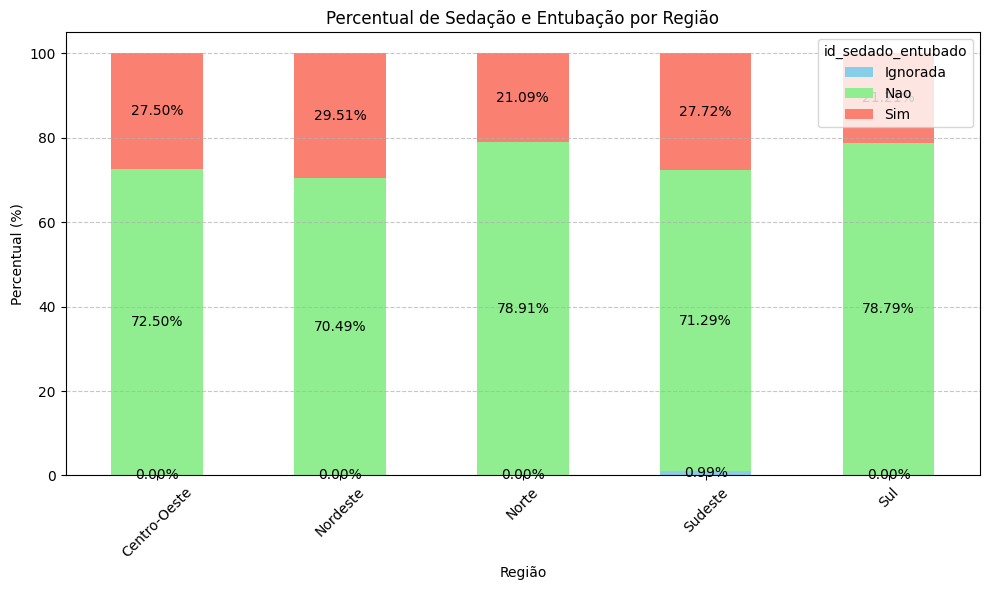

In [148]:
# Calcular os percentuais de sedação e entubação por região
percentual_sedacao_regiao = dados_filtrados.groupby('regiao')['id_sedado_entubado'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_sedacao_regiao.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Sedação e Entubação por Região')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()




**Resumo da Análise Exploratória Por Região**

O gráfico “Percentual de Sedação e Intubação por Região” mostra a distribuição dos pacientes que estão sedados e entubados por diferentes regiões do Brasil.

Centro-oeste:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Nordeste:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Norte:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Sudeste:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Sul:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante


**Observações:**
Tendência Geral: A maioria dos pacientes em todas as regiões não está sedada ou entubada.
Percentual de Sedação e Entubação: Relativamente baixo em todas as regiões, com pequenas variações.

**Conclusão:**
Os dados indicam que, independentemente da região, a maioria dos pacientes não necessita de sedação ou entubação. As variações entre as regiões são mínimas, sugerindo uma consistência nas práticas médicas ou nas condições dos pacientes.


# ANALISE EXPLORATÓRIA DE DADOS = PACIENTES COM CODIV19 QUE ESTÃO EM POSSO DE UM PLANO DE SAUDE

# Paciente tem algum plano de saúde médico, seja particular, de empresa ou de órgão público?

In [149]:
# Converter as colunas para categóricas
dados3['id_possui_plano_saude'] = dados3['id_possui_plano_saude'].astype(str)

# Contar os valores específicos em cada coluna
contagem_internado = dados3['id_possui_plano_saude'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_possui_plano_saude:")
print(contagem_internado)

Percentual de id_possui_plano_saude:
id_possui_plano_saude
Nao         75.916939
Sim         23.619725
Ignorada     0.463336
Name: proportion, dtype: float64


#  PLANO DE SAÚDE POR FAIXA ETÁRIA?

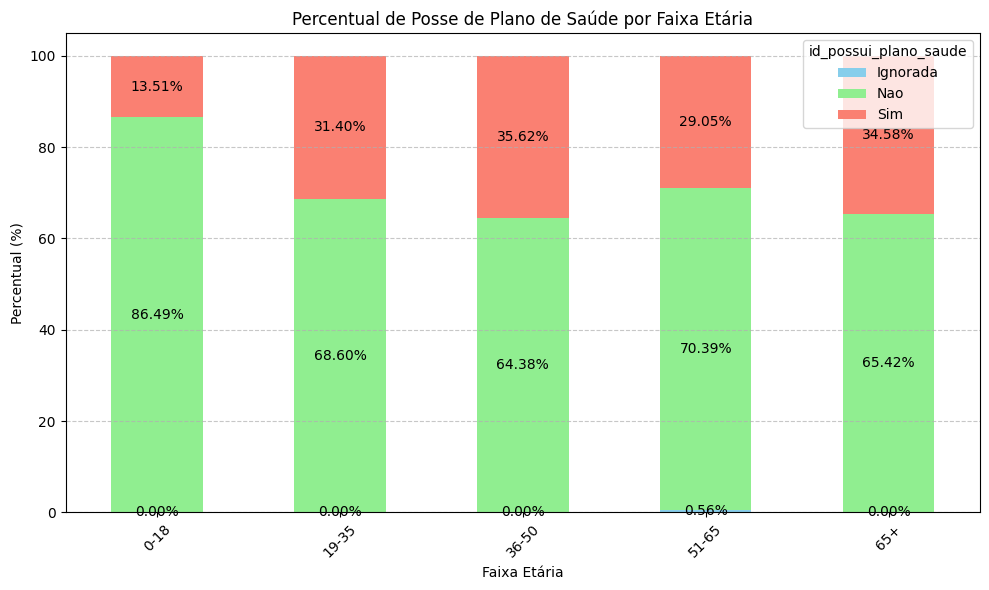

In [150]:
# Calcular os percentuais de posse de plano de saúde por faixa etária
percentual_plano_faixa_etaria = dados_filtrados.groupby('faixa_etaria')['id_possui_plano_saude'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_plano_faixa_etaria.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Posse de Plano de Saúde por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()


**Resumo da Análise Exploratória Por Faixa Etária**

O gráfico “Percentual de Posse de Plano de Saúde por Faixa Etária” mostra a distribuição da posse de planos de saúde por diferentes faixas etárias.


Faixa Etária 0-18:
* Não Possuem Plano de Saúde: 86.49%
* Possuem Plano de Saúde: 13.51%

Faixa Etária 19-35:
* Não Possuem Plano de Saúde: 68.60%
* Possuem Plano de Saúde: 31.40%

Faixa Etária 36-50:
* Não Possuem Plano de Saúde: 64.38%
* Possuem Plano de Saúde: 35.62%

Faixa Etária 51-65:
* Não Possuem Plano de Saúde: 70.39%
* Possuem Plano de Saúde: 29.61%

Faixa Etária 65+:
* Não Possuem Plano de Saúde: 65.42%
* Possuem Plano de Saúde: 34.58%


**Observações:**
Tendência Geral: A maioria das pessoas em todas as faixas etárias não possui plano de saúde.
Faixa Etária 19-23 e 24-28: Apresentam percentuais mais altos de posse de plano de saúde em comparação com outras faixas etárias.


**Conclusão:**
Os dados indicam que a posse de planos de saúde é menor nas faixas etárias mais jovens e aumenta ligeiramente nas faixas etárias intermediárias. Isso pode refletir a acessibilidade financeira ou a prioridade dada à saúde em diferentes estágios da vida.

# PLANO DE SAÚDE POR SEXO

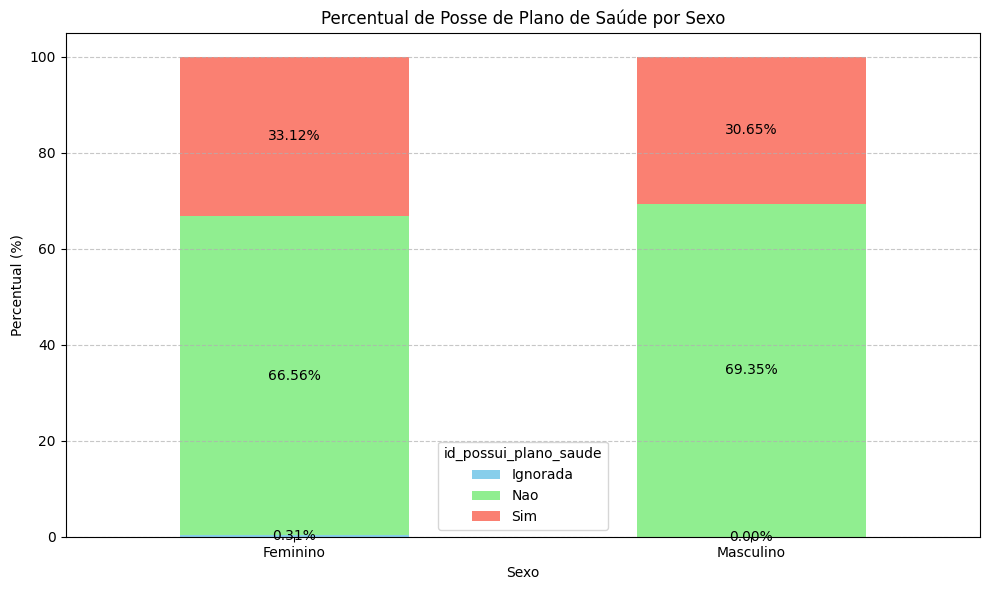

In [151]:
# Calcular os percentuais de posse de plano de saúde por sexo
percentual_plano_sexo = dados_filtrados.groupby('id_sexo_label')['id_possui_plano_saude'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_plano_sexo.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Posse de Plano de Saúde por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória Por Sexo**

O gráfico “Percentual de Posse de Plano de Saúde por Sexo” mostra a distribuição da posse de planos de saúde por gênero.

Feminino:
* Possuem Plano de Saúde: 66.56%
* Não Possuem Plano de Saúde: 33.12%
* Ignorada: 0.31%

Masculino:
* Possuem Plano de Saúde: 69.35%
* Não Possuem Plano de Saúde: 30.65%
* Ignorada: 0.00%


**Observações:**
Tendência Geral: A maioria das pessoas de ambos os sexos possui plano de saúde.
Comparação entre Gêneros: A porcentagem de homens com plano de saúde é ligeiramente maior do que a de mulheres.


**Conclusão:**
Os dados indicam que a posse de planos de saúde é alta tanto para homens quanto para mulheres, com uma leve vantagem para os homens. Isso pode refletir diferenças nas prioridades de saúde ou na acessibilidade financeira entre os gêneros.

# POSSUEM PLANO DE SAÚDE POR REGIÃO

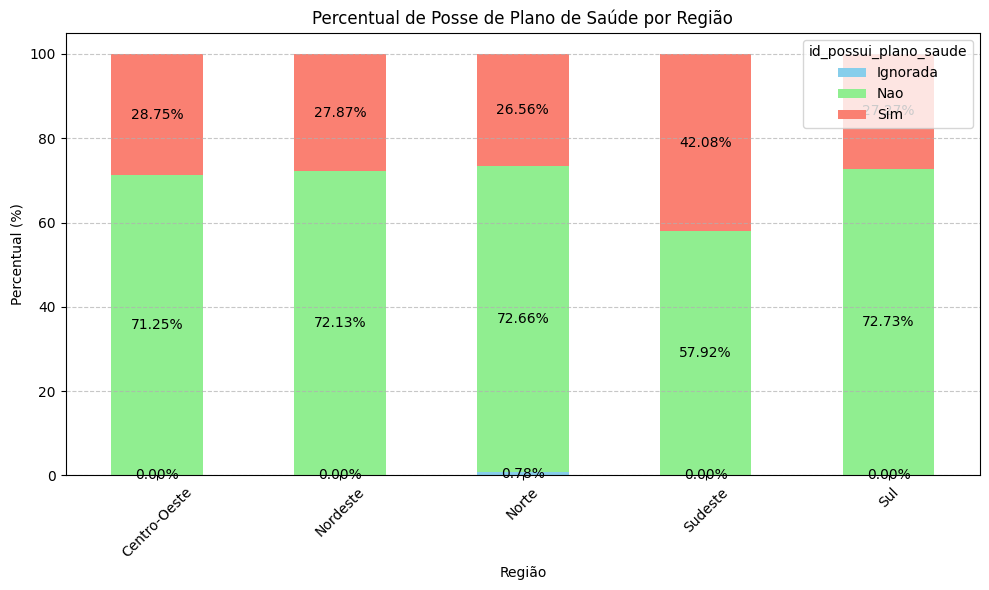

In [152]:
# Calcular os percentuais de posse de plano de saúde por região
percentual_plano_regiao = dados_filtrados.groupby('regiao')['id_possui_plano_saude'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_plano_regiao.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Posse de Plano de Saúde por Região')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória Por Região**

O gráfico “Percentual de Posse de Plano de Saúde por Região” mostra a distribuição da posse de planos de saúde por diferentes regiões do Brasil.

Centro-Oeste:
* Possuem Plano de Saúde: 28.75%
* Não Possuem Plano de Saúde: 71.25%

Nordeste:
* Possuem Plano de Saúde: 27.87%
* Não Possuem Plano de Saúde: 72,13%

Norte:
* Possuem Plano de Saúde: 26.56%
* Não Possuem Plano de Saúde: 72.66%

Sudeste:
* Possuem Plano de Saúde: 42.08%
* Não Possuem Plano de Saúde: 57.92%

Sul:
* Possuem Plano de Saúde: 27.87%
* Não Possuem Plano de Saúde: 72,73%

**Observações:**
Tendência Geral: A maioria das pessoas em todas as regiões não possui plano de saúde.
Região Sudeste: Apresenta o maior percentual de posse de plano de saúde (42.08%).
Regiões Norte e Nordeste: Têm os menores percentuais de posse de plano de saúde, com 26.56% e 27.87%, respectivamente.

**Conclusão:**
Os dados indicam que a posse de planos de saúde varia entre as regiões, com o Sudeste apresentando a maior cobertura. As regiões Norte e Nordeste têm os menores percentuais de posse de plano de saúde, o que pode refletir desigualdades regionais na acessibilidade aos planos de saúde.



# ANÁLISE DE TOTAL RECEBIDOS DE AUXÍLIO EMERGENCIAL POR NIVEL DE ESCOLARIDADE

In [155]:
# Verificar se a coluna 'tt_valores_recebidos' está no formato correto
print(dados3['tt_valores_recebidos'].unique())

# Agrupar por 'id_escolaridade' e contar os valores de 'tt_valores_recebidos'
total_valores_por_escolaridade = dados3.groupby('id_escolaridade')['tt_valores_recebidos'].value_counts(normalize=True).unstack().fillna(0) * 100

# Exibir o resultado
print(total_valores_por_escolaridade)

['Até 2000' 'Até 800' 'Até 1200' 'Acima de 5000' 'Até 5000' 'Até 500']
tt_valores_recebidos  Acima de 5000   Até 1200  Até 2000   Até 500  Até 5000  \
id_escolaridade                                                                
Fund. Compl.              51.116293  17.987993  2.172282  0.089786  0.572217   
Fund. Incompl.            43.357099  25.448656  2.936342  0.097869  0.857763   
Médio Compl.              49.944176  18.286216  2.353762  0.112843  0.707763   
Médio Incompl.            41.217591  25.447166  3.585924  0.114597  1.017046   
Pós, Mest, Dout           86.831203   2.875252  0.417832  0.127474  0.084983   
S/ Inst                   43.363025  25.700876  3.144162  0.101777  1.145626   
Sup Compl.                76.351624   5.948745  0.842974  0.144725  0.198291   
Sup. Incompl.             60.485799  12.611171  1.637680  0.149662  0.357813   

tt_valores_recebidos    Até 800  
id_escolaridade                  
Fund. Compl.          28.061430  
Fund. Incompl.        27.3

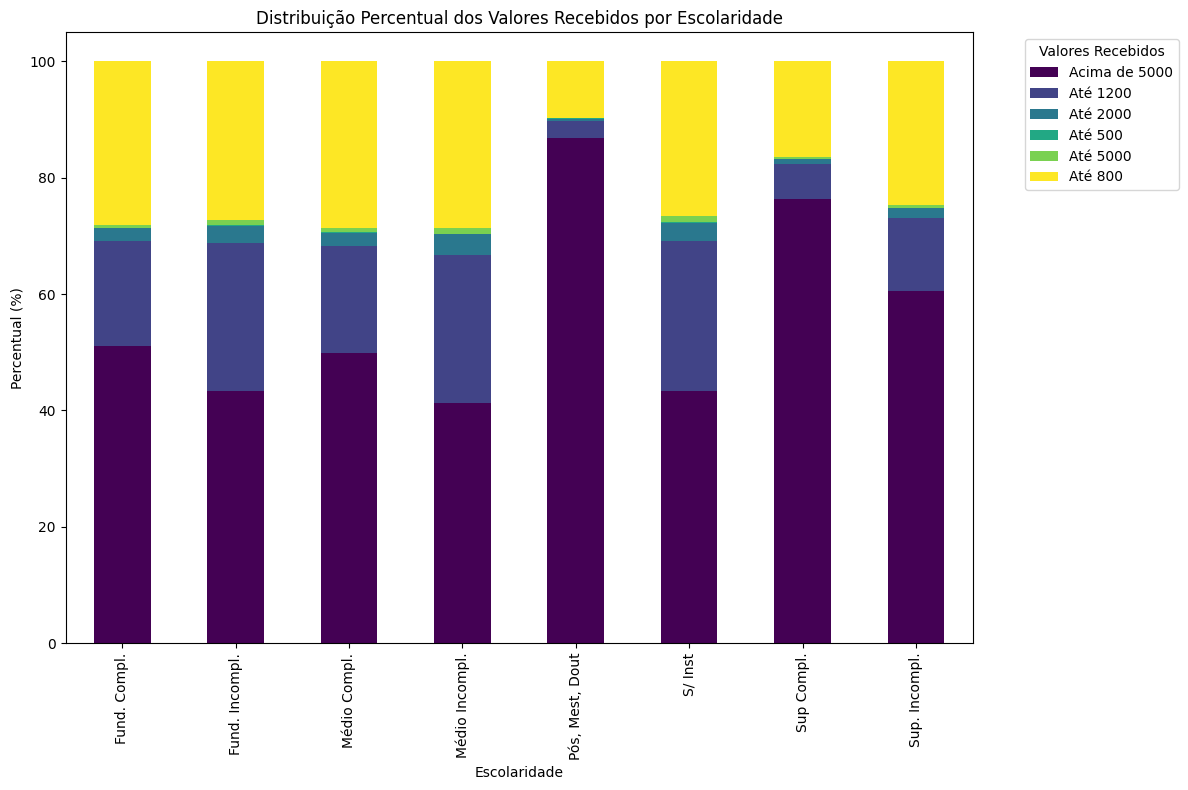

In [156]:
# Plotar o gráfico de barras empilhadas
total_valores_por_escolaridade.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adicionar título e rótulos
plt.title('Distribuição Percentual dos Valores Recebidos por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Percentual (%)')
plt.legend(title='Valores Recebidos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Distribuição Percentual dos Valores Recebidos por Escolaridade**

**ANALISE DO IMPACTO DO NIVEL DE ESCOLARIDADE**

**Fundamental Completo:** A maior parte dos valores recebidos está na faixa “Acima de 5000” (aproximadamente 51%), seguida por “Até 800” (28%) e “Até 1200” (18%).

**Fundamental Incompleto:** Similar ao Fundamental Completo, a maior parte dos valores está na faixa “Acima de 5000” (43%), com uma distribuição significativa também em “Até 800” (27%) e “Até 1200” (25%).

**Médio Completo:** A distribuição é bastante similar ao Fundamental Completo, com “Acima de 5000” representando cerca de 50% e “Até 800” com 28%. Médio Incompleto: A maior parte dos valores está na faixa “Acima de 5000” (41%), seguida por “Até 800” (29%) e “Até 1200” (25%).

**Superior Completo:** A maior parte dos valores recebidos está na faixa “Acima de 5000” (76%), indicando uma tendência de maiores valores recebidos com maior nível de escolaridade.

**Superior Incompleto: **A distribuição é mais equilibrada, com “Acima de 5000” representando 60% e “Até 1200” com 13%.

**Pós-graduação Completa:** A maior parte dos valores está na faixa “Acima de 5000” (86%), indicando que indivíduos com pós-graduação tendem a receber valores mais altos.

**Pós-graduação Incompleta:** A distribuição é similar, com “Acima de 5000” representando a maior parte (86%).

**Sem Instrução:** A maior parte dos valores recebidos está na faixa “Acima de 5000” (43%), seguida por “Até 800” (26%) e “Até 1200” (25%).

**Tendência Geral:** Há uma clara tendência de que níveis mais altos de escolaridade estão associados a uma maior proporção de valores recebidos na faixa “Acima de 5000”.

**Distribuição Equilibrada:** Níveis de escolaridade mais baixos (Fundamental e Médio) mostram uma distribuição mais equilibrada entre as faixas de valores recebidos.

**Impacto da Escolaridade:** A escolaridade parece ter um impacto significativo na distribuição dos valores recebidos, com níveis mais altos de escolaridade correlacionando-se com valores recebidos mais altos

# DISTRIBUIÇÃO DO AUXILIO EMERGENCIAL POR FAIXA ETÁRIA COR DA RAÇA

In [157]:
# Converter as colunas para categóricas
dados3['id_auxilio_emergencial'] = dados3['id_auxilio_emergencial'].astype(str)

# Contar os valores específicos em cada coluna
recebeu_auxilio = dados3['id_auxilio_emergencial'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Recebeu Auxilio Emergencial:")
print(recebeu_auxilio)

Recebeu Auxilio Emergencial:
id_auxilio_emergencial
Não    50.298186
Sim    49.701814
Name: proportion, dtype: float64


In [158]:
# Verificar se a coluna 'tt_valores_recebidos' está no formato correto
print(dados3['id_auxilio_emergencial'].unique())

# Agrupar por 'id_escolaridade' e contar os valores de 'tt_valores_recebidos'
auxilio_emergicial_por_raca = dados3.groupby('id_cor_raca')['id_auxilio_emergencial'].value_counts(normalize=True).unstack().fillna(0) * 100

# Exibir o resultado
print(auxilio_emergicial_por_raca)

['Sim' 'Não']
id_auxilio_emergencial        Não        Sim
id_cor_raca                                 
Amarela                 60.425532  39.574468
Branca                  61.321162  38.678838
Ignorada                55.963303  44.036697
Indígena                39.123339  60.876661
Parda                   41.584546  58.415454
Preta                   45.415846  54.584154


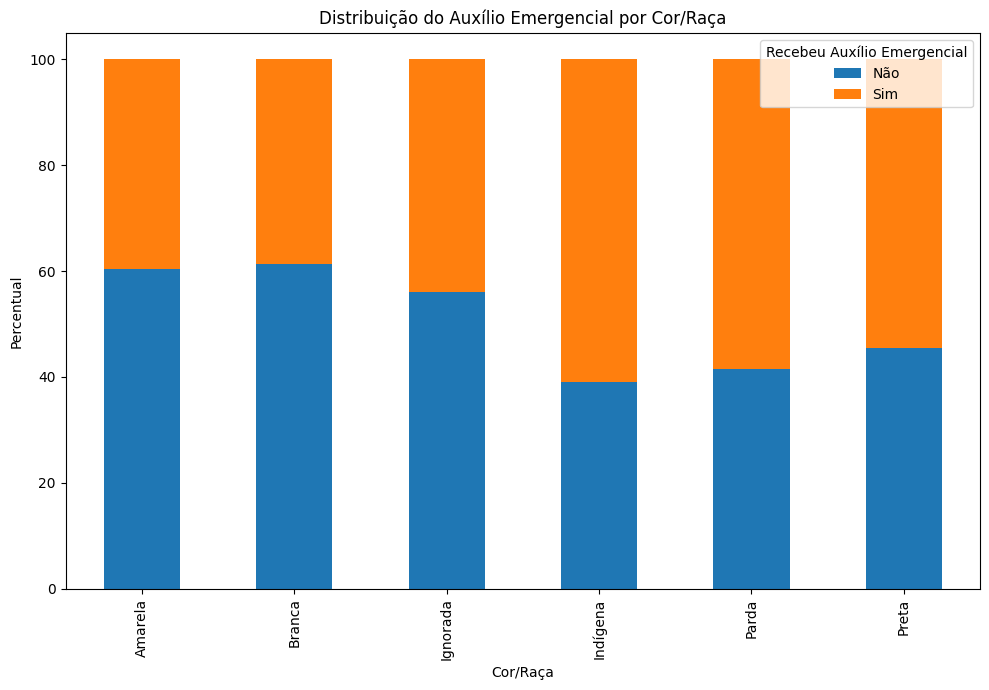

In [159]:
data = {
    'id_cor_raca': ['Amarela', 'Branca', 'Ignorada', 'Indígena', 'Parda', 'Preta'],
    'Não': [60.425532, 61.321162, 55.963303, 39.123339, 41.584546, 45.415846],
    'Sim': [39.574468, 38.678838, 44.036697, 60.876661, 58.415454, 54.584154]
}

df = pd.DataFrame(data)

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Plotar os dados
df.set_index('id_cor_raca').plot(kind='bar', stacked=True, ax=ax)

# Adicionar título e rótulos
ax.set_title('Distribuição do Auxílio Emergencial por Cor/Raça')
ax.set_xlabel('Cor/Raça')
ax.set_ylabel('Percentual')

# Adicionar legenda
plt.legend(title='Recebeu Auxílio Emergencial')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

**Distribuição do Auxílio Emergencial por cor de raça:**

**Amarela:** Aproximadamente 60% das pessoas não receberam auxílio emergencial..

**Branca:** A distribuição é semelhante à da cor amarela, com cerca de 61%.

**Indígena:** A maioria das pessoas indígenas (cerca de 61%) recebeu auxílio emergencial.

**Parda:** Cerca de 58% das pessoas pardas receberam auxílio.

**Preta: **Aproximadamente 55% das pessoas pretas receberam auxílio.


**Observações Gerais:**
As categorias “Indígena” e “Parda” têm as maiores porcentagens de recebimento de auxílio emergencial, com 61% e 58%, respectivamente.

As categorias “Amarela” e “Branca” têm as menores porcentagens de recebimento de auxílio, com cerca de 40% e 39%, respectivamente.

**Desigualdade Racial:**
A análise sugere que há uma variação significativa na distribuição do auxílio emergencial entre diferentes grupos raciais. Grupos como os indígenas e pardos parecem ter uma maior necessidade ou acesso ao auxílio emergencial.